In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv('web-page-phishing.csv')
df.head()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [3]:
df.shape

(100077, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100077 entries, 0 to 100076
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   url_length      100077 non-null  int64
 1   n_dots          100077 non-null  int64
 2   n_hypens        100077 non-null  int64
 3   n_underline     100077 non-null  int64
 4   n_slash         100077 non-null  int64
 5   n_questionmark  100077 non-null  int64
 6   n_equal         100077 non-null  int64
 7   n_at            100077 non-null  int64
 8   n_and           100077 non-null  int64
 9   n_exclamation   100077 non-null  int64
 10  n_space         100077 non-null  int64
 11  n_tilde         100077 non-null  int64
 12  n_comma         100077 non-null  int64
 13  n_plus          100077 non-null  int64
 14  n_asterisk      100077 non-null  int64
 15  n_hastag        100077 non-null  int64
 16  n_dollar        100077 non-null  int64
 17  n_percent       100077 non-null  int64
 18  n_re

In [5]:
df.isna().sum()

url_length        0
n_dots            0
n_hypens          0
n_underline       0
n_slash           0
n_questionmark    0
n_equal           0
n_at              0
n_and             0
n_exclamation     0
n_space           0
n_tilde           0
n_comma           0
n_plus            0
n_asterisk        0
n_hastag          0
n_dollar          0
n_percent         0
n_redirection     0
phishing          0
dtype: int64

In [6]:
df.describe()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
count,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000
mean,39.177683,2.224397,0.405188,0.137724,1.135386,0.024391,0.215834,0.022143,0.143330,0.002608,0.004876,0.003617,0.002378,0.002468,0.004097,0.000450,0.001899,0.109286,0.361532,0.363340
std,47.971847,1.255046,1.285465,0.723995,1.828526,0.167789,0.959802,0.268393,0.913656,0.082207,0.144569,0.078500,0.079558,0.104382,0.284046,0.058028,0.097412,1.695327,0.775492,0.480964
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,44.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,4165.000000,24.000000,43.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,18.000000,5.000000,11.000000,19.000000,60.000000,13.000000,10.000000,174.000000,17.000000,1.000000


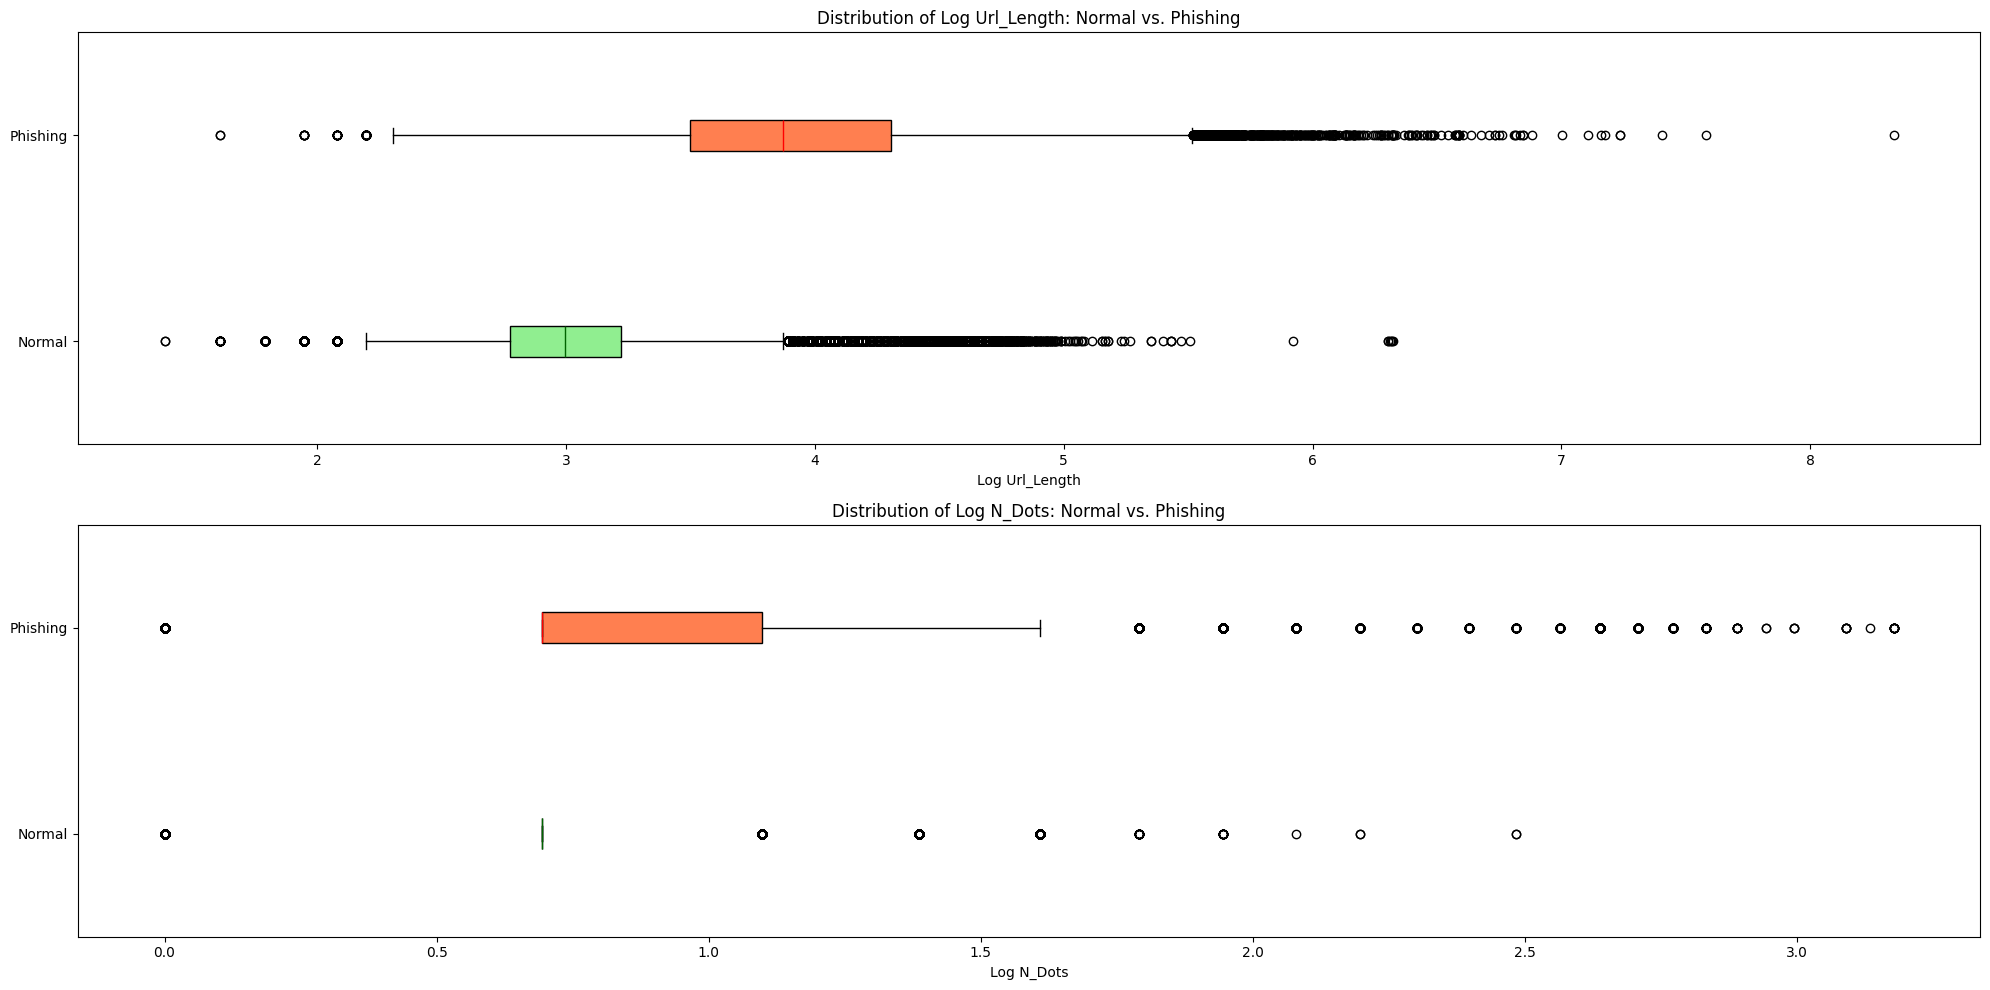

In [7]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(20,10))
for i,col in enumerate(['url_length','n_dots']):
    ax[i].boxplot(np.log(df.loc[df['phishing'] == 0,col]),
            vert=False, positions=[1], patch_artist=True,
            boxprops=dict(facecolor='lightgreen'),
            medianprops=dict(color='darkgreen'))
    ax[i].boxplot(np.log(df.loc[df['phishing'] == 1,col]),
            vert=False, positions=[2], patch_artist=True,
            boxprops=dict(facecolor='coral'),
            medianprops=dict(color='red'))
    ax[i].set_title(f'Distribution of Log {col.title()}: Normal vs. Phishing')
    ax[i].set_xlabel(f'Log {col.title()}')
    ax[i].set_yticks([1, 2], ['Normal', 'Phishing'])

plt.tight_layout()
plt.show()

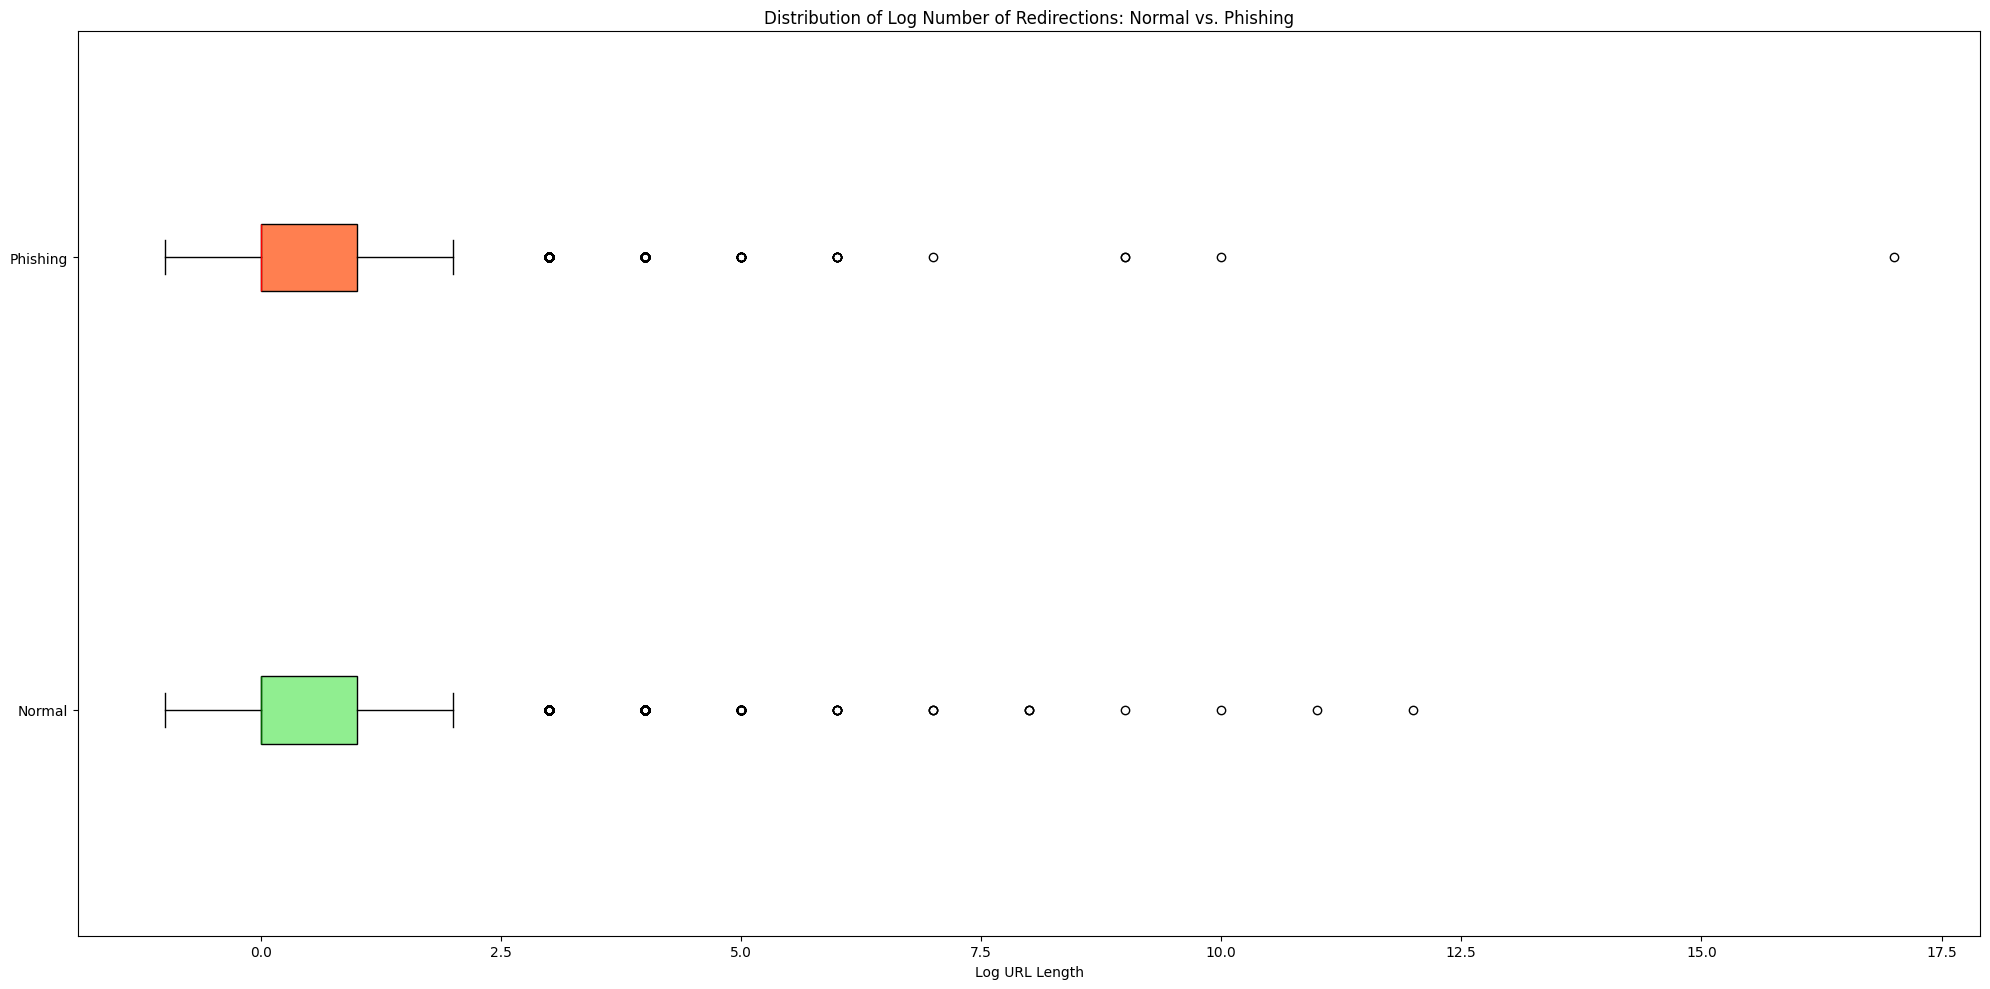

In [8]:
plt.figure(figsize=(20,10))
plt.boxplot((df.loc[df['phishing'] == 0,'n_redirection']),
            vert=False, positions=[1], patch_artist=True,
            boxprops=dict(facecolor='lightgreen'),
            medianprops=dict(color='darkgreen'))
plt.boxplot((df.loc[df['phishing'] == 1,'n_redirection']),
            vert=False, positions=[2], patch_artist=True,
            boxprops=dict(facecolor='coral'),
            medianprops=dict(color='red'))
plt.title('Distribution of Log Number of Redirections: Normal vs. Phishing')
plt.xlabel('Log URL Length')
plt.yticks([1, 2], ['Normal', 'Phishing'])
plt.tight_layout()
plt.show()

In [9]:
descriptive_stats = df.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19]].groupby('phishing').describe()
descriptive_stats

n_hypens                                               n_underline  \
            count      mean       std  min  25%  50%  75%   max       count   
phishing                                                                      
0         63715.0  0.259123  1.132106  0.0  0.0  0.0  0.0  43.0     63715.0   
1         36362.0  0.661130  1.482982  0.0  0.0  0.0  1.0  35.0     36362.0   

                    ... n_dollar       n_percent                           \
              mean  ...      75%   max     count      mean       std  min   
phishing            ...                                                     
0         0.045672  ...      0.0   0.0   63715.0  0.075838  1.530602  0.0   
1         0.299021  ...      0.0  10.0   36362.0  0.167895  1.949346  0.0   

                                
          25%  50%  75%    max  
phishing                        
0         0.0  0.0  0.0  174.0  
1         0.0  0.0  0.0  162.0  

[2 rows x 128 columns]

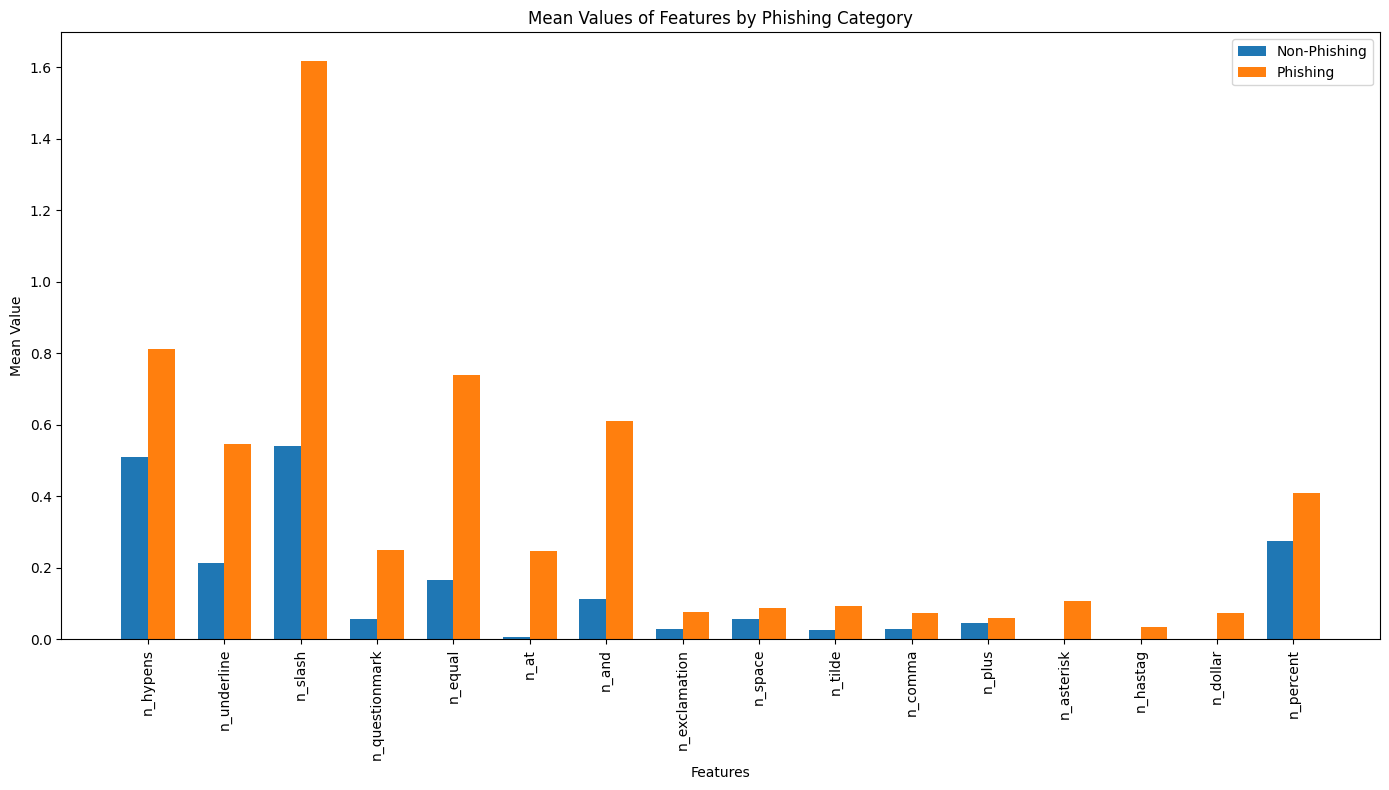

In [10]:
stat_data = descriptive_stats.xs('mean', level=1, axis=1)
stat_data = np.sqrt(stat_data)

n_features = len(stat_data.columns)
index = np.arange(n_features)
bar_width = 0.35

plt.figure(figsize=(14, 8))
plt.bar(index, stat_data.iloc[0], bar_width, label='Non-Phishing')
plt.bar(index + bar_width, stat_data.iloc[1], bar_width, label='Phishing')

plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Mean Values of Features by Phishing Category')
plt.xticks(index + bar_width / 2, stat_data.columns, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

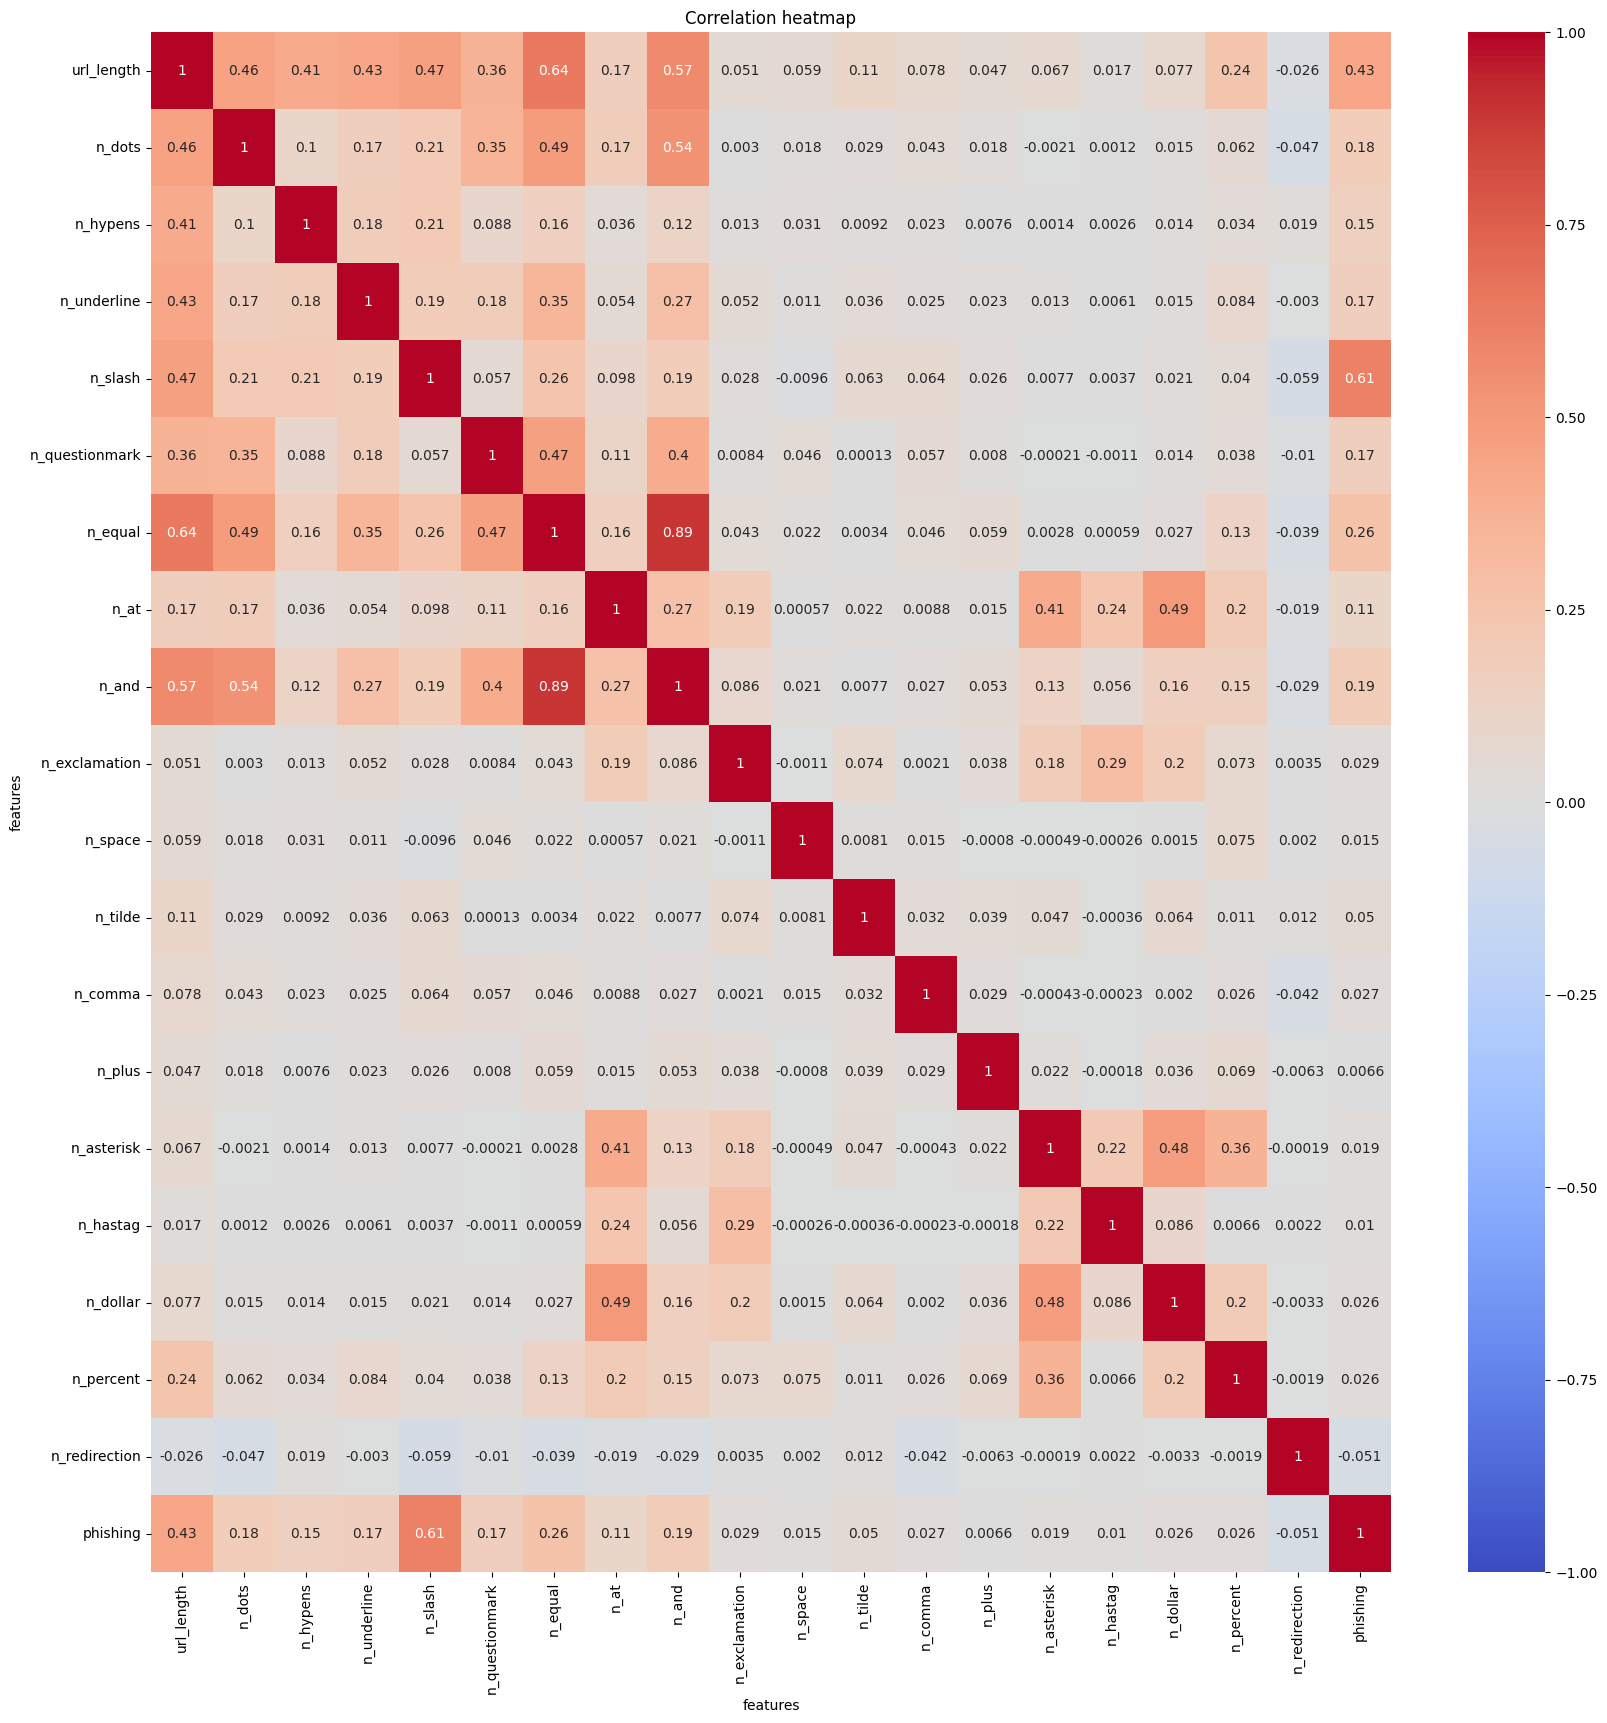

In [11]:
corr_coeff=df.corr()
plt.figure(figsize=(20,20))
heatmap=sns.heatmap(corr_coeff,vmin=-1,vmax=1,annot=True,cmap='coolwarm')
heatmap.set_xlabel('features')
heatmap.set_ylabel('features')
heatmap.set_title('Correlation heatmap')
plt.show()

In [12]:
X = df.drop(['phishing'],axis=1).values
y = df['phishing'].values

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [16]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=25,validation_split=0.2,)

Epoch 1/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 398us/step - accuracy: 0.8561 - loss: 0.3268 - val_accuracy: 0.8809 - val_loss: 0.2687
Epoch 2/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - accuracy: 0.8818 - loss: 0.2670 - val_accuracy: 0.8846 - val_loss: 0.2630
Epoch 3/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 389us/step - accuracy: 0.8840 - loss: 0.2599 - val_accuracy: 0.8850 - val_loss: 0.2656
Epoch 4/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 355us/step - accuracy: 0.8838 - loss: 0.2584 - val_accuracy: 0.8873 - val_loss: 0.2615
Epoch 5/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 360us/step - accuracy: 0.8888 - loss: 0.2517 - val_accuracy: 0.8883 - val_loss: 0.2575
Epoch 6/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 354us/step - accuracy: 0.8873 - loss: 0.2531 - val_accuracy: 0.8855 - val_loss: 0.2576
Epoch 7/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 362us/step - accuracy: 0.8872 - loss: 0.2512 - val_accuracy: 0.8884 - val_loss: 0.2565
Epoch 8/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 352us/step - accuracy: 0.8878 -

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step - accuracy: 0.8916 - loss: 0.2526
Test Accuracy: 0.8937849998474121


In [18]:
def confusion_matrix_plot(y_test,predictions):
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d",
                cmap="Blues",
                square=True,
                cbar=False,
                xticklabels=['False', 'True'],
                yticklabels=['False', 'True'])
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(2) + 0.5
    plt.xticks(tick_marks, ['Non-phishing', 'Phishing'], rotation=0)
    plt.yticks(tick_marks, ['Non-phishing', 'Phishing'], rotation=0)
    plt.tight_layout()
    plt.show()

def area_under_curve(model,X_test,y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend()
    plt.show()




def calculate_metrics(model,X_test,y_test):
    predictions = model.predict(X_test)
    print(f"Accuracy Score: {accuracy_score(y_test,predictions)}")
    confusion_matrix_plot(y_test,predictions)
    area_under_curve(model,X_test,y_test)

#calculate_metrics(model,X_test,y_test)

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step


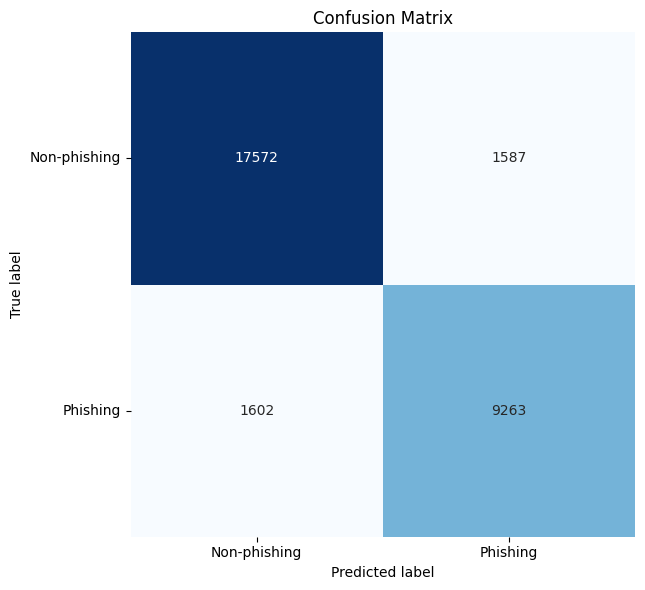

In [19]:
predictions = (model.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step


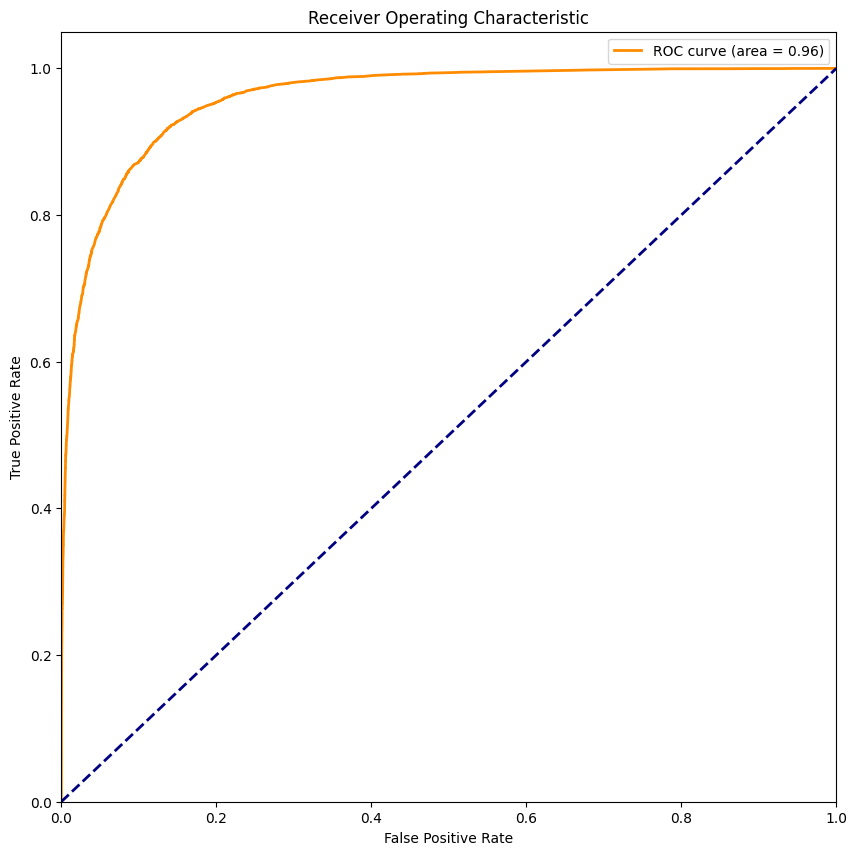

In [20]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [21]:
model1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, y_train, epochs=25,validation_split=0.2,)

Epoch 1/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 373us/step - accuracy: 0.8498 - loss: 0.3362 - val_accuracy: 0.8770 - val_loss: 0.2751
Epoch 2/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 322us/step - accuracy: 0.8765 - loss: 0.2728 - val_accuracy: 0.8801 - val_loss: 0.2692
Epoch 3/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 323us/step - accuracy: 0.8819 - loss: 0.2639 - val_accuracy: 0.8834 - val_loss: 0.2633
Epoch 4/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 339us/step - accuracy: 0.8807 - loss: 0.2624 - val_accuracy: 0.8842 - val_loss: 0.2621
Epoch 5/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 324us/step - accuracy: 0.8836 - loss: 0.2595 - val_accuracy: 0.8814 - val_loss: 0.2622
Epoch 6/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 324us/step - accuracy: 0.8816 - loss: 0.2612 - val_accuracy: 0.8854 - val_loss: 0.2588
Epoch 7/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 333us/step - accuracy: 0.8817 - loss: 0.2586 - val_accuracy: 0.8859 - val_loss: 0.2592
Epoch 8/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step - accuracy: 0.8845 -

In [22]:
test_loss, test_acc = model1.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step - accuracy: 0.8886 - loss: 0.2523
Test Accuracy: 0.8910537958145142


939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step


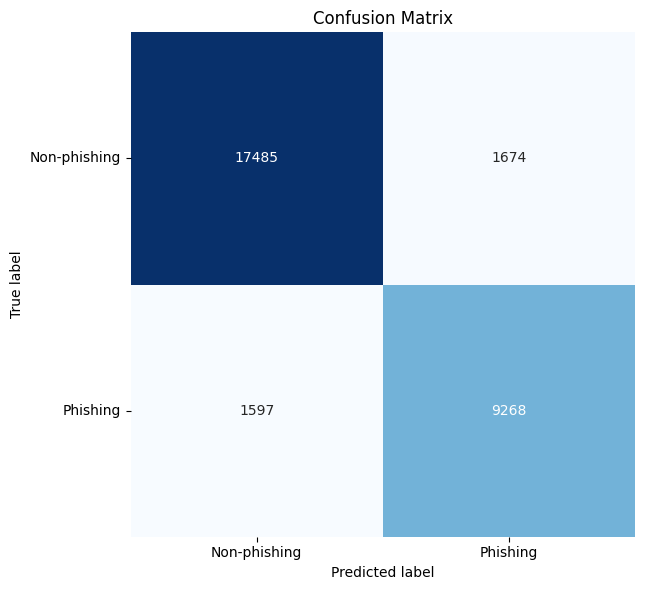

In [23]:
predictions = (model1.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step


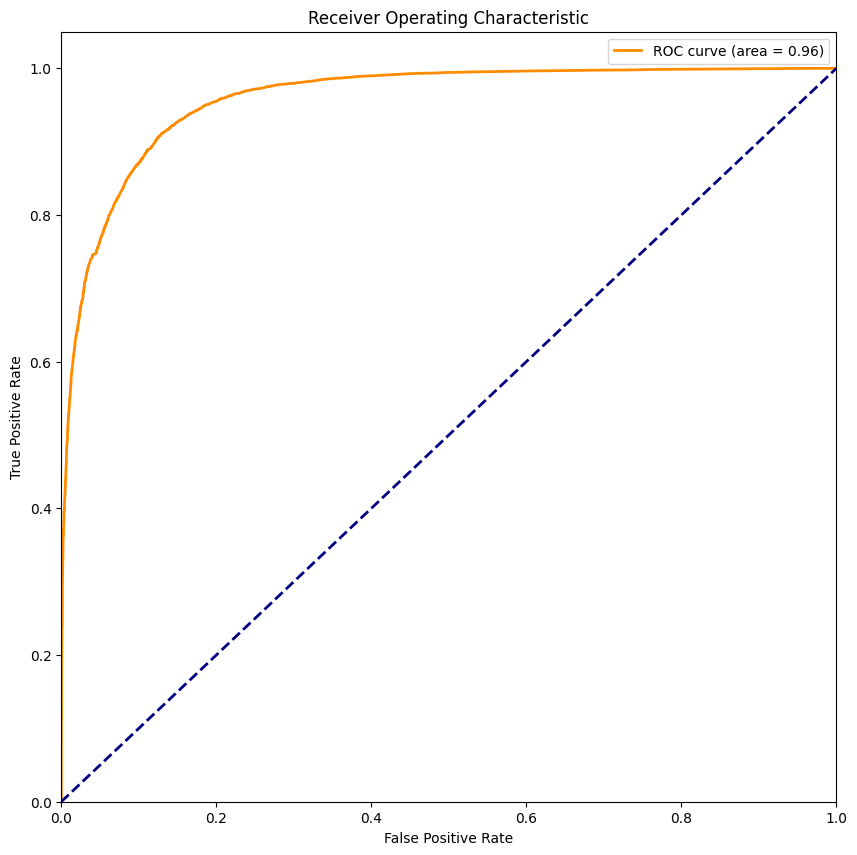

In [24]:
y_pred_proba = model1.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [25]:
model2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model2.fit(X_train, y_train, epochs=25,validation_split=0.2,)

Epoch 1/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step - accuracy: 0.8622 - loss: 0.3205 - val_accuracy: 0.8777 - val_loss: 0.2708
Epoch 2/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 370us/step - accuracy: 0.8774 - loss: 0.2741 - val_accuracy: 0.8818 - val_loss: 0.2668
Epoch 3/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 369us/step - accuracy: 0.8809 - loss: 0.2675 - val_accuracy: 0.8841 - val_loss: 0.2648
Epoch 4/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step - accuracy: 0.8806 - loss: 0.2660 - val_accuracy: 0.8832 - val_loss: 0.2606
Epoch 5/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 373us/step - accuracy: 0.8829 - loss: 0.2601 - val_accuracy: 0.8849 - val_loss: 0.2594
Epoch 6/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 357us/step - accuracy: 0.8841 - loss: 0.2584 - val_accuracy: 0.8867 - val_loss: 0.2555
Epoch 7/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 359us/step - accuracy: 0.8886 - loss: 0.2538 - val_accuracy: 0.8874 - val_loss: 0.2543
Epoch 8/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 375us/step - accuracy: 0.8897 -

In [26]:
test_loss, test_acc = model2.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - accuracy: 0.8867 - loss: 0.2518
Test Accuracy: 0.8898881077766418


939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step


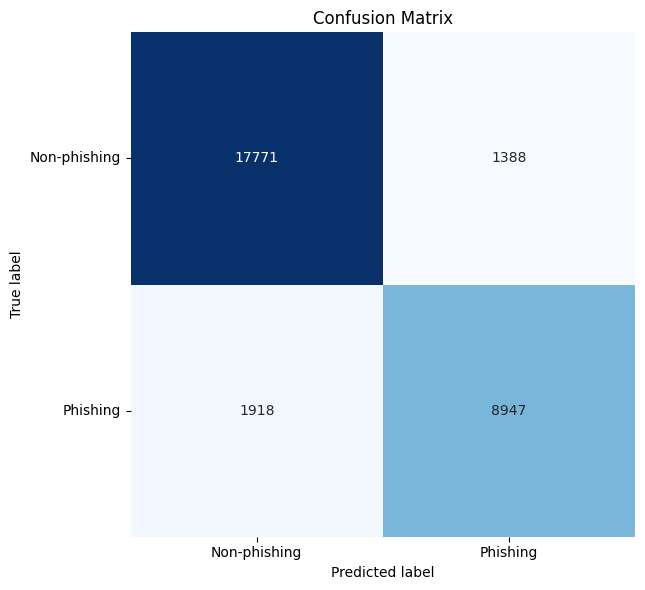

In [27]:
predictions = (model2.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step


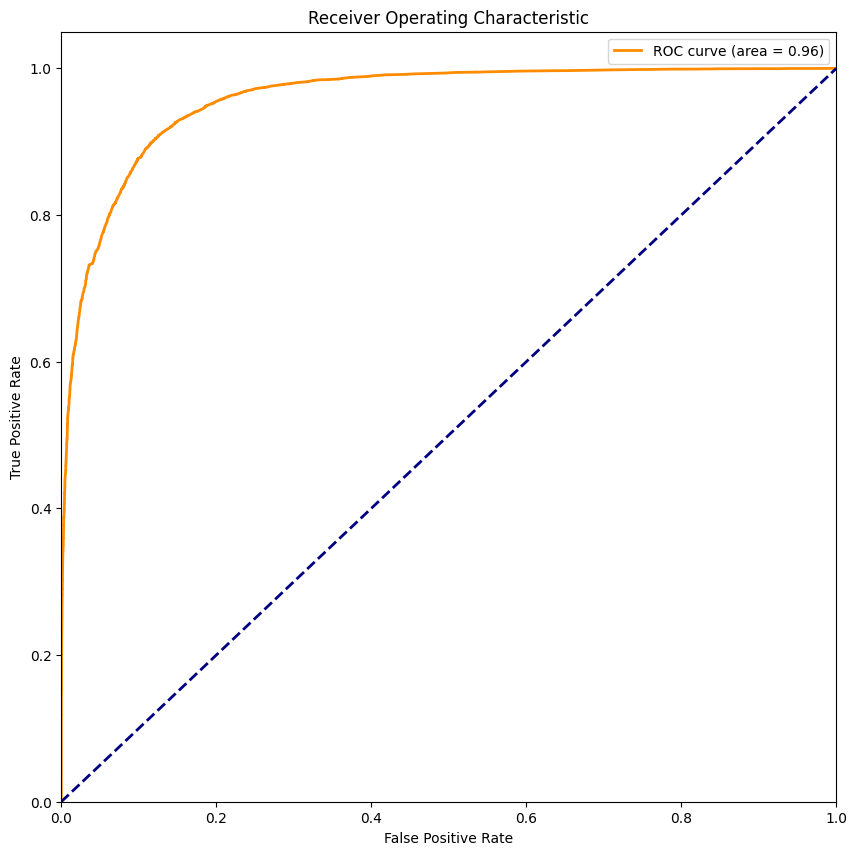

In [28]:
y_pred_proba = model2.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [29]:
model3 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model3.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model3.fit(X_train, y_train, epochs=25,validation_split=0.2,)

Epoch 1/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.8604 - loss: 0.3154 - val_accuracy: 0.8788 - val_loss: 0.2694
Epoch 2/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 397us/step - accuracy: 0.8782 - loss: 0.2717 - val_accuracy: 0.8829 - val_loss: 0.2672
Epoch 3/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 411us/step - accuracy: 0.8794 - loss: 0.2668 - val_accuracy: 0.8834 - val_loss: 0.2622
Epoch 4/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 397us/step - accuracy: 0.8839 - loss: 0.2579 - val_accuracy: 0.8848 - val_loss: 0.2589
Epoch 5/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step - accuracy: 0.8844 - loss: 0.2574 - val_accuracy: 0.8865 - val_loss: 0.2594
Epoch 6/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 395us/step - accuracy: 0.8888 - loss: 0.2527 - val_accuracy: 0.8872 - val_loss: 0.2553
Epoch 7/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 393us/step - accuracy: 0.8886 - loss: 0.2479 - val_accuracy: 0.8842 - val_loss: 0.2568
Epoch 8/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step - accuracy: 0.8879 -

In [30]:
test_loss, test_acc = model3.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step - accuracy: 0.8889 - loss: 0.2520
Test Accuracy: 0.8921529650688171


939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step


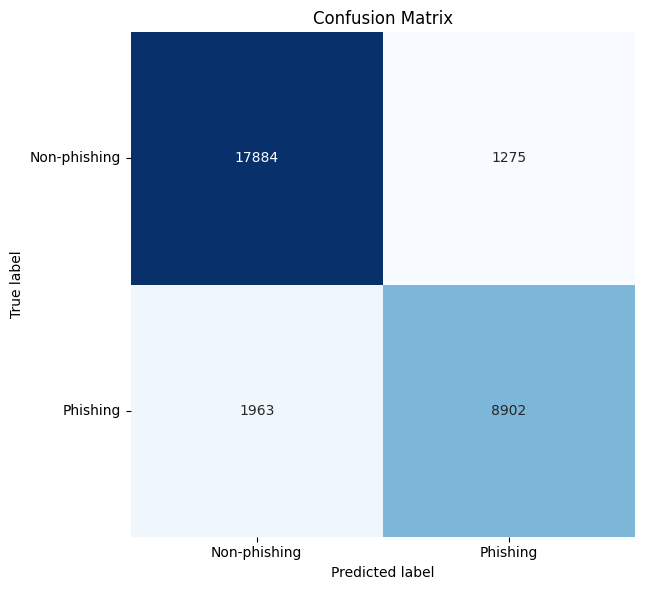

In [31]:
predictions = (model3.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step


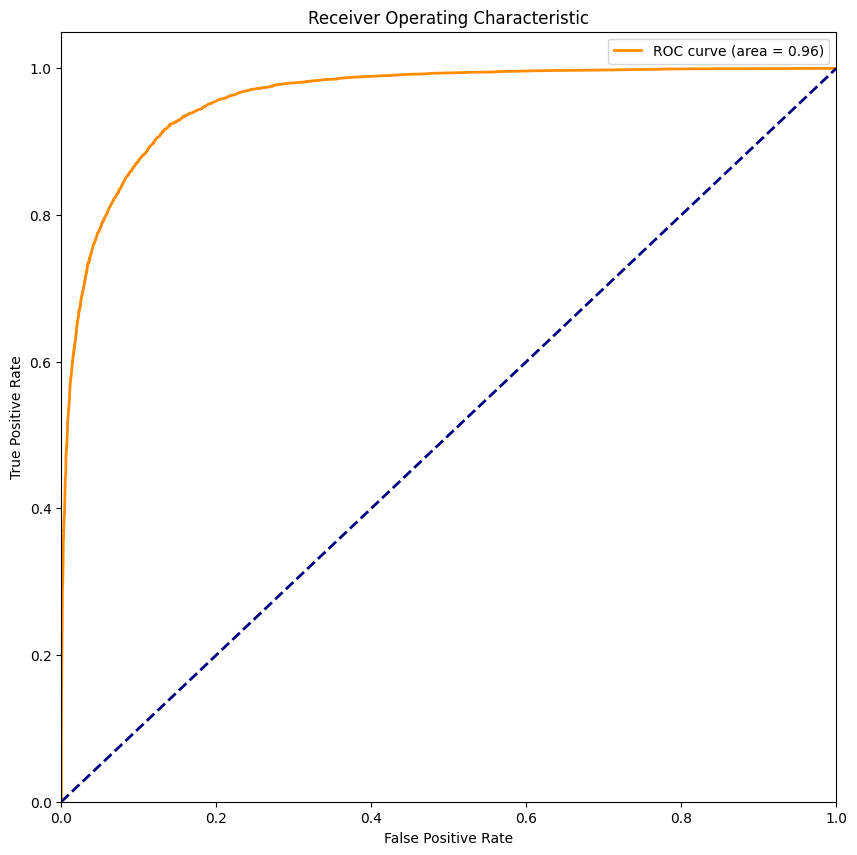

In [32]:
y_pred_proba = model3.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [33]:
model4 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model4.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model4.fit(X_train, y_train, epochs=25,validation_split=0.2,)

Epoch 1/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 421us/step - accuracy: 0.8640 - loss: 0.3152 - val_accuracy: 0.8795 - val_loss: 0.2695
Epoch 2/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 394us/step - accuracy: 0.8793 - loss: 0.2694 - val_accuracy: 0.8844 - val_loss: 0.2645
Epoch 3/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 393us/step - accuracy: 0.8837 - loss: 0.2609 - val_accuracy: 0.8863 - val_loss: 0.2623
Epoch 4/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 397us/step - accuracy: 0.8858 - loss: 0.2550 - val_accuracy: 0.8894 - val_loss: 0.2601
Epoch 5/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 390us/step - accuracy: 0.8869 - loss: 0.2561 - val_accuracy: 0.8881 - val_loss: 0.2575
Epoch 6/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 386us/step - accuracy: 0.8869 - loss: 0.2483 - val_accuracy: 0.8887 - val_loss: 0.2549
Epoch 7/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 382us/step - accuracy: 0.8872 - loss: 0.2508 - val_accuracy: 0.8882 - val_loss: 0.2550
Epoch 8/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step - accuracy: 0.8884 -

In [34]:
test_loss, test_acc = model4.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step - accuracy: 0.8902 - loss: 0.2532
Test Accuracy: 0.8932187557220459


939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step


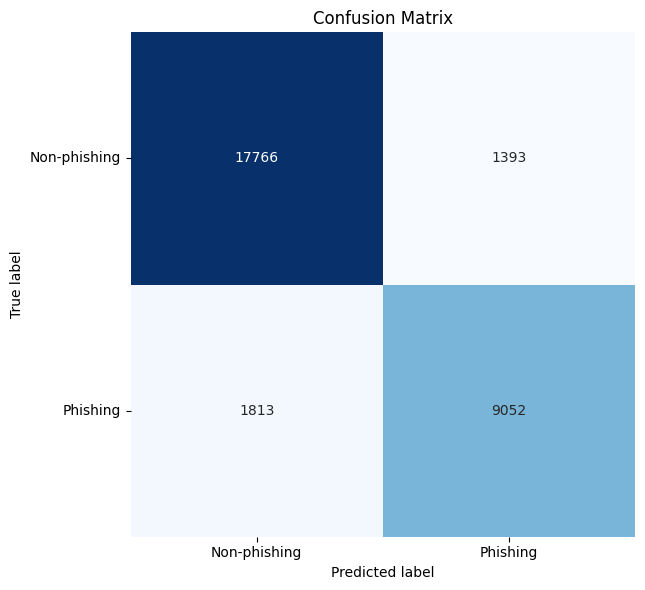

In [35]:
predictions = (model4.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step


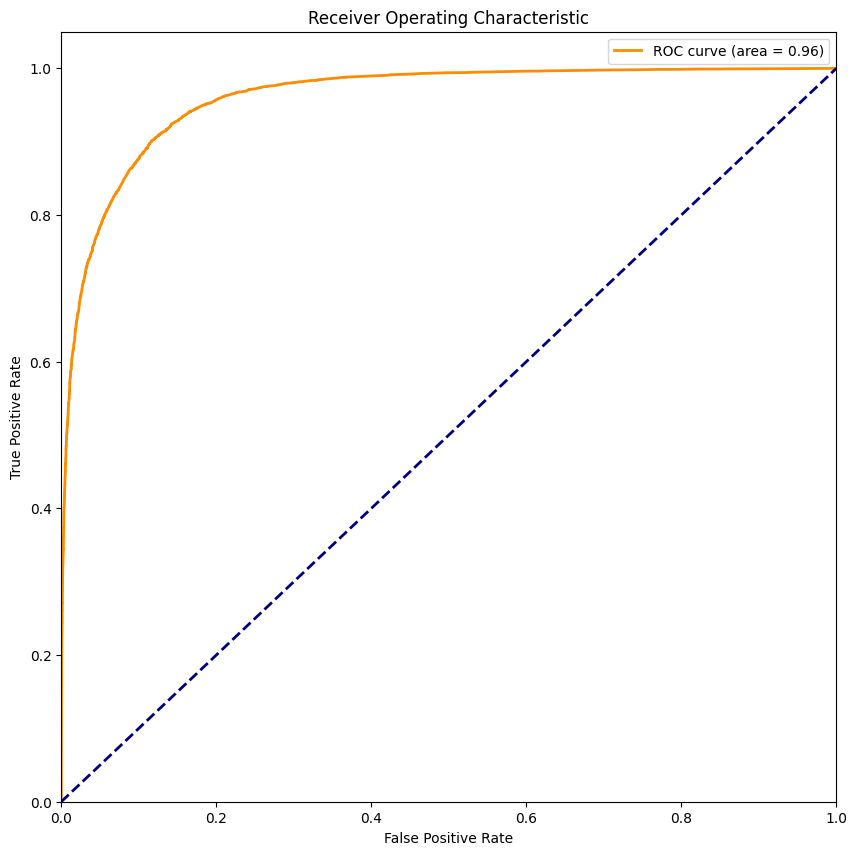

In [36]:
y_pred_proba = model4.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [37]:
from tensorflow.keras.layers import LeakyReLU
model5 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation=LeakyReLU(alpha=0.1)),
    Dense(64, activation=LeakyReLU(alpha=0.1)),
    Dense(32, activation=LeakyReLU(alpha=0.1)),
    Dense(1, activation='sigmoid')
])

model5.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model5.fit(X_train, y_train, epochs=25,validation_split=0.2,)

Epoch 1/25


/Users/rosireddyvangala/Documents/Webpage_phishing2/.venv/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 439us/step - accuracy: 0.8673 - loss: 0.3151 - val_accuracy: 0.8816 - val_loss: 0.2707
Epoch 2/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 415us/step - accuracy: 0.8770 - loss: 0.2696 - val_accuracy: 0.8851 - val_loss: 0.2649
Epoch 3/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 413us/step - accuracy: 0.8835 - loss: 0.2626 - val_accuracy: 0.8837 - val_loss: 0.2640
Epoch 4/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step - accuracy: 0.8848 - loss: 0.2586 - val_accuracy: 0.8859 - val_loss: 0.2626
Epoch 5/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step - accuracy: 0.8858 - loss: 0.2551 - val_accuracy: 0.8861 - val_loss: 0.2626
Epoch 6/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step - accuracy: 0.8859 - loss: 0.2531 - val_accuracy: 0.8845 - val_loss: 0.2623
Epoch 7/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 418us/step - accuracy: 0.8849 - loss: 0.2533 - val_accuracy: 0.8855 - val_loss: 0.2589
Epoch 8/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 403us/step - accuracy: 0.8869 - loss: 0.25

In [38]:
test_loss, test_acc = model5.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step - accuracy: 0.8902 - loss: 0.2560
Test Accuracy: 0.8921529650688171


939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step


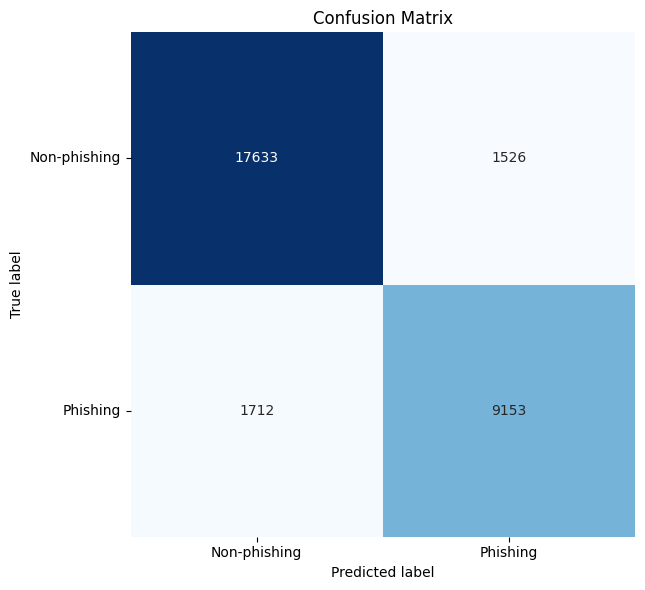

In [39]:
predictions = (model5.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step


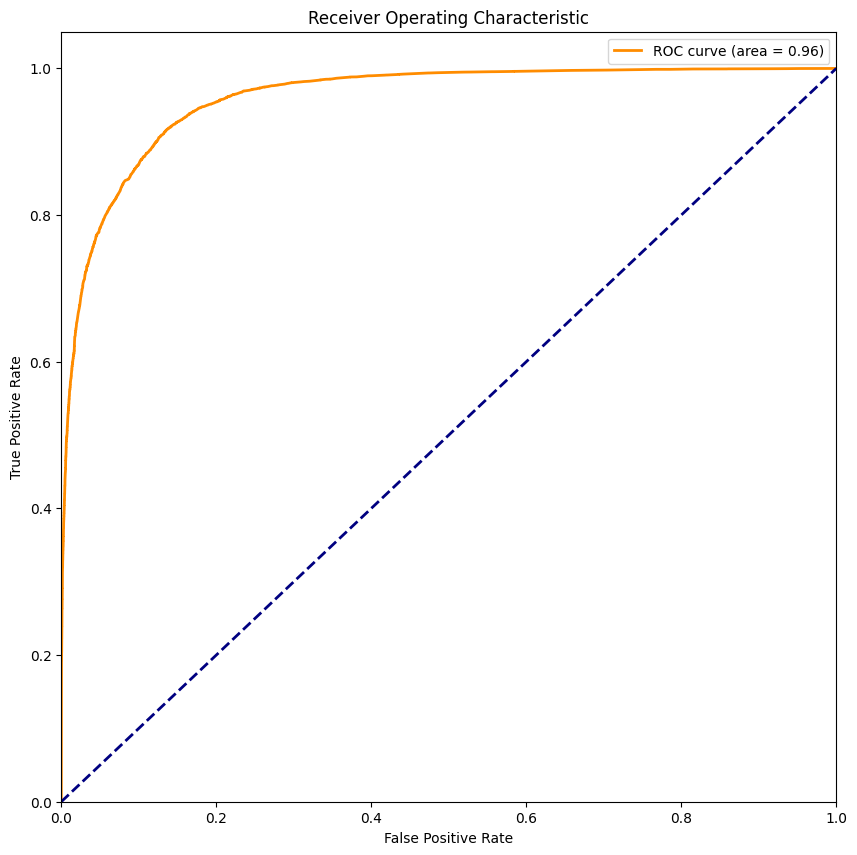

In [40]:
y_pred_proba = model5.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [41]:

model6 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='tanh'),
    Dense(64, activation=LeakyReLU(alpha=0.1)),
    Dense(32, activation=LeakyReLU(alpha=0.1)),
    Dense(1, activation='sigmoid')
])

model6.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model6.fit(X_train, y_train, epochs=25,validation_split=0.2,)

Epoch 1/25


/Users/rosireddyvangala/Documents/Webpage_phishing2/.venv/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 481us/step - accuracy: 0.8662 - loss: 0.3045 - val_accuracy: 0.8795 - val_loss: 0.2675
Epoch 2/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - accuracy: 0.8805 - loss: 0.2675 - val_accuracy: 0.8843 - val_loss: 0.2623
Epoch 3/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 421us/step - accuracy: 0.8808 - loss: 0.2643 - val_accuracy: 0.8841 - val_loss: 0.2652
Epoch 4/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step - accuracy: 0.8814 - loss: 0.2619 - val_accuracy: 0.8864 - val_loss: 0.2585
Epoch 5/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step - accuracy: 0.8842 - loss: 0.2580 - val_accuracy: 0.8877 - val_loss: 0.2585
Epoch 6/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 404us/step - accuracy: 0.8856 - loss: 0.2542 - val_accuracy: 0.8878 - val_loss: 0.2579
Epoch 7/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step - accuracy: 0.8872 - loss: 0.2530 - val_accuracy: 0.8860 - val_loss: 0.2562
Epoch 8/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 393us/step - accuracy: 0.8859 - loss: 0.25

In [42]:
test_loss, test_acc = model6.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - accuracy: 0.8921 - loss: 0.2507
Test Accuracy: 0.8934519290924072


939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step


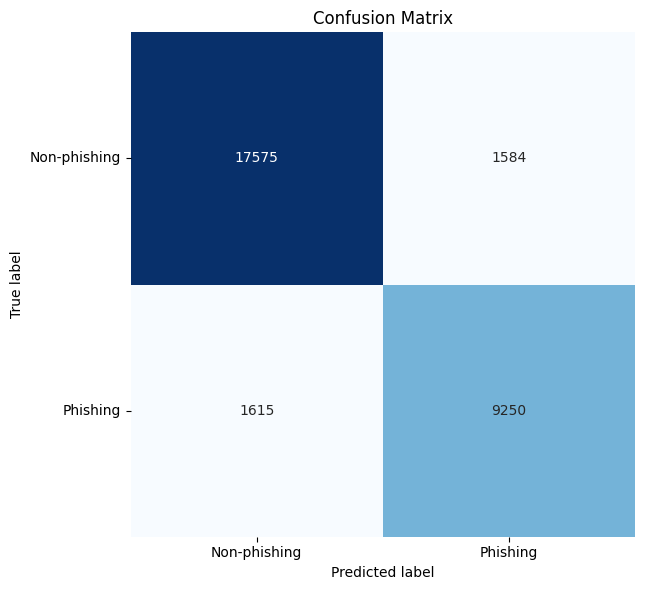

In [43]:
predictions = (model6.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

In [44]:

model7 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='tanh'),
    Dense(64, activation=LeakyReLU(alpha=0.1)),
    Dense(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model7.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model7.fit(X_train, y_train, epochs=25,validation_split=0.2)

Epoch 1/25


/Users/rosireddyvangala/Documents/Webpage_phishing2/.venv/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 424us/step - accuracy: 0.8675 - loss: 0.3007 - val_accuracy: 0.8804 - val_loss: 0.2693
Epoch 2/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - accuracy: 0.8791 - loss: 0.2693 - val_accuracy: 0.8834 - val_loss: 0.2631
Epoch 3/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 402us/step - accuracy: 0.8815 - loss: 0.2644 - val_accuracy: 0.8831 - val_loss: 0.2628
Epoch 4/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step - accuracy: 0.8820 - loss: 0.2609 - val_accuracy: 0.8868 - val_loss: 0.2583
Epoch 5/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 395us/step - accuracy: 0.8852 - loss: 0.2549 - val_accuracy: 0.8854 - val_loss: 0.2560
Epoch 6/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step - accuracy: 0.8855 - loss: 0.2557 - val_accuracy: 0.8845 - val_loss: 0.2549
Epoch 7/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 390us/step - accuracy: 0.8894 - loss: 0.2519 - val_accuracy: 0.8865 - val_loss: 0.2526
Epoch 8/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 389us/step - accuracy: 0.8878 - loss: 0.25

In [45]:
test_loss, test_acc = model7.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step - accuracy: 0.8867 - loss: 0.2522
Test Accuracy: 0.889555037021637


939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step


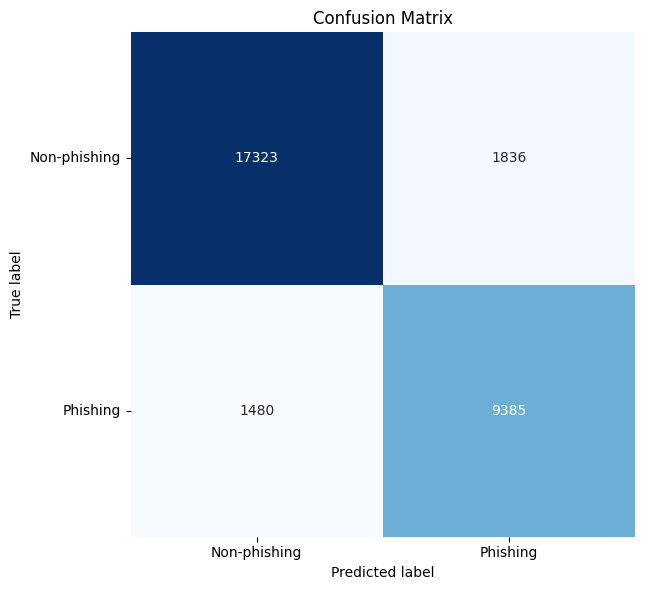

In [46]:
predictions = (model7.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

In [47]:
#from tensorflow.keras.layers import LeakyReLU
model8 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='tanh'),
    Dense(64, activation='relu'),
    Dense(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model8.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model8.fit(X_train, y_train, epochs=25,validation_split=0.2)

Epoch 1/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - accuracy: 0.8614 - loss: 0.3068 - val_accuracy: 0.8770 - val_loss: 0.2751
Epoch 2/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 407us/step - accuracy: 0.8801 - loss: 0.2695 - val_accuracy: 0.8822 - val_loss: 0.2629
Epoch 3/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 390us/step - accuracy: 0.8829 - loss: 0.2624 - val_accuracy: 0.8839 - val_loss: 0.2637
Epoch 4/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 388us/step - accuracy: 0.8842 - loss: 0.2562 - val_accuracy: 0.8892 - val_loss: 0.2546
Epoch 5/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 393us/step - accuracy: 0.8861 - loss: 0.2526 - val_accuracy: 0.8898 - val_loss: 0.2558
Epoch 6/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 394us/step - accuracy: 0.8867 - loss: 0.2553 - val_accuracy: 0.8883 - val_loss: 0.2544
Epoch 7/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 377us/step - accuracy: 0.8888 - loss: 0.2478 - val_accuracy: 0.8877 - val_loss: 0.2543
Epoch 8/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step - accuracy: 0.8876 -

In [48]:
test_loss, test_acc = model8.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step - accuracy: 0.8877 - loss: 0.2536
Test Accuracy: 0.8899213671684265


939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step


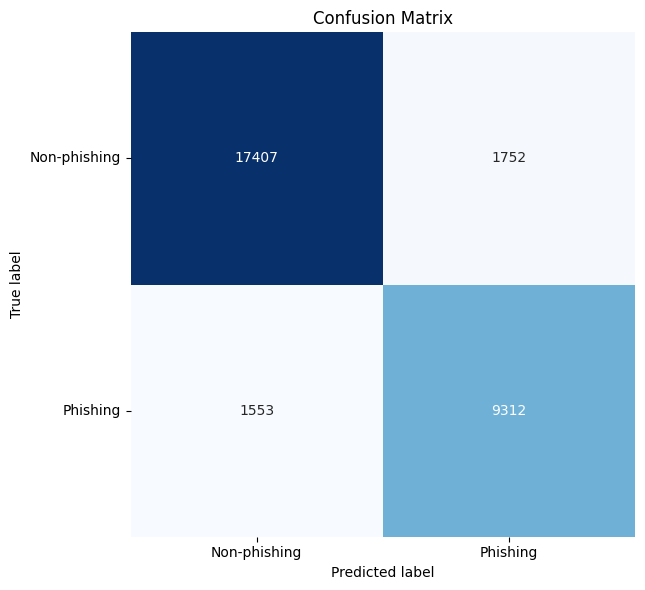

In [49]:
predictions = (model8.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

In [50]:
#from tensorflow.keras.layers import LeakyReLU
model9 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model9.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model9.fit(X_train, y_train, epochs=25,validation_split=0.2)

Epoch 1/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.8640 - loss: 0.3086 - val_accuracy: 0.8805 - val_loss: 0.2678
Epoch 2/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - accuracy: 0.8788 - loss: 0.2716 - val_accuracy: 0.8827 - val_loss: 0.2609
Epoch 3/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - accuracy: 0.8833 - loss: 0.2632 - val_accuracy: 0.8845 - val_loss: 0.2625
Epoch 4/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - accuracy: 0.8863 - loss: 0.2579 - val_accuracy: 0.8857 - val_loss: 0.2553
Epoch 5/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 409us/step - accuracy: 0.8868 - loss: 0.2500 - val_accuracy: 0.8890 - val_loss: 0.2544
Epoch 6/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 418us/step - accuracy: 0.8867 - loss: 0.2506 - val_accuracy: 0.8870 - val_loss: 0.2530
Epoch 7/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step - accuracy: 0.8879 - loss: 0.2483 - val_accuracy: 0.8875 - val_loss: 0.2528
Epoch 8/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 411us/step - accuracy: 0.8913 -

In [51]:
test_loss, test_acc = model9.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - accuracy: 0.8918 - loss: 0.2487
Test Accuracy: 0.8942179679870605


939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step


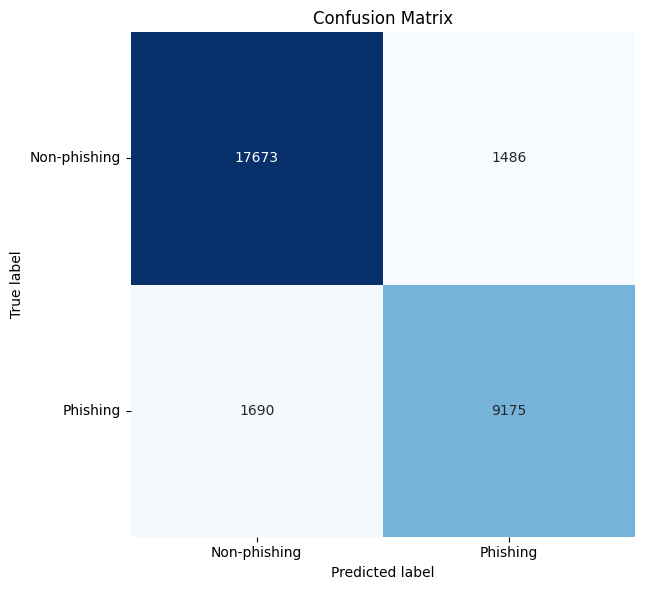

In [52]:
predictions = (model9.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

In [53]:
df.columns

Index(['url_length', 'n_dots', 'n_hypens', 'n_underline', 'n_slash',
       'n_questionmark', 'n_equal', 'n_at', 'n_and', 'n_exclamation',
       'n_space', 'n_tilde', 'n_comma', 'n_plus', 'n_asterisk', 'n_hastag',
       'n_dollar', 'n_percent', 'n_redirection', 'phishing'],
      dtype='object')

In [54]:
'''df['dots_share'] = round(df['n_dots']/df['url_length'],2)
df['hypens_share'] = round(df['n_hypens']/df['url_length'],2)
df['underline_share'] = round(df['n_underline']/df['url_length'],2)
df['slash_share'] = round(df['n_slash']/df['url_length'],2)
df['questionmark_share'] = round(df['n_questionmark']/df['url_length'],2)
df['equal_share'] = round(df['n_equal']/df['url_length'],2)
df['at_share'] = round(df['n_at']/df['url_length'],2)
df['and_share'] = round(df['n_and']/df['url_length'],2)
df['exclamation_share'] = round(df['n_exclamation']/df['url_length'],2)
df['space_share'] = round(df['n_space']/df['url_length'],2)
df['tilde_share'] = round(df['n_tilde']/df['url_length'],2)
df['comma_share'] = round(df['n_comma']/df['url_length'],2)
df['plus_share'] = round(df['n_plus']/df['url_length'],2)
df['percent_share'] = round(df['n_percent']/df['url_length'],2)
df.head()'''

"df['dots_share'] = round(df['n_dots']/df['url_length'],2)\ndf['hypens_share'] = round(df['n_hypens']/df['url_length'],2)\ndf['underline_share'] = round(df['n_underline']/df['url_length'],2)\ndf['slash_share'] = round(df['n_slash']/df['url_length'],2)\ndf['questionmark_share'] = round(df['n_questionmark']/df['url_length'],2)\ndf['equal_share'] = round(df['n_equal']/df['url_length'],2)\ndf['at_share'] = round(df['n_at']/df['url_length'],2)\ndf['and_share'] = round(df['n_and']/df['url_length'],2)\ndf['exclamation_share'] = round(df['n_exclamation']/df['url_length'],2)\ndf['space_share'] = round(df['n_space']/df['url_length'],2)\ndf['tilde_share'] = round(df['n_tilde']/df['url_length'],2)\ndf['comma_share'] = round(df['n_comma']/df['url_length'],2)\ndf['plus_share'] = round(df['n_plus']/df['url_length'],2)\ndf['percent_share'] = round(df['n_percent']/df['url_length'],2)\ndf.head()"

In [55]:
df['total_spchar']=df['n_dots']+df['n_hypens']+df['n_underline']+df['n_slash']+df['n_questionmark']+df['n_equal']+df['n_at']+df['n_and']+df['n_exclamation']+df['n_space']+df['n_tilde']+df['n_comma']+df['n_plus']+df['n_percent']
df.iloc[2,:]

url_length        126
n_dots              4
n_hypens            1
n_underline         2
n_slash             0
n_questionmark      1
n_equal             3
n_at                0
n_and               2
n_exclamation       0
n_space             0
n_tilde             0
n_comma             0
n_plus              0
n_asterisk          0
n_hastag            0
n_dollar            0
n_percent           0
n_redirection       1
phishing            1
total_spchar       13
Name: 2, dtype: int64

In [56]:
df['spchar_share']=round(df['total_spchar']/df['url_length'],2)

In [57]:
df.iloc[2:10,:].values

array([[1.26e+02, 4.00e+00, 1.00e+00, 2.00e+00, 0.00e+00, 1.00e+00,
        3.00e+00, 0.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 1.00e+00, 1.30e+01, 1.00e-01],
       [1.80e+01, 2.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 2.00e+00, 1.10e-01],
       [5.50e+01, 2.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 4.00e+00, 7.00e-02],
       [3.20e+01, 3.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 1.00e+00, 4.00e+00,

In [58]:
df.describe()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,...,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing,total_spchar,spchar_share
count,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,...,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000
mean,39.177683,2.224397,0.405188,0.137724,1.135386,0.024391,0.215834,0.022143,0.143330,0.002608,...,0.002378,0.002468,0.004097,0.000450,0.001899,0.109286,0.361532,0.363340,4.433626,0.121459
std,47.971847,1.255046,1.285465,0.723995,1.828526,0.167789,0.959802,0.268393,0.913656,0.082207,...,0.079558,0.104382,0.284046,0.058028,0.097412,1.695327,0.775492,0.480964,5.055318,0.043844
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,1.000000,0.000000
25%,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.090000
50%,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.120000
75%,44.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,0.150000
max,4165.000000,24.000000,43.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,...,11.000000,19.000000,60.000000,13.000000,10.000000,174.000000,17.000000,1.000000,180.000000,0.430000


In [59]:
X = df.drop(['phishing'],axis=1).values
y = df['phishing'].values

In [60]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [61]:
scaler1 = StandardScaler()
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)

In [62]:
#from tensorflow.keras.layers import LeakyReLU
model10 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model10.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model10.fit(X_train, y_train, epochs=25,validation_split=0.2)

Epoch 1/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 2s 607us/step - accuracy: 0.8615 - loss: 0.3138 - val_accuracy: 0.8760 - val_loss: 0.2686
Epoch 2/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step - accuracy: 0.8829 - loss: 0.2633 - val_accuracy: 0.8805 - val_loss: 0.2639
Epoch 3/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 393us/step - accuracy: 0.8862 - loss: 0.2574 - val_accuracy: 0.8854 - val_loss: 0.2595
Epoch 4/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step - accuracy: 0.8885 - loss: 0.2522 - val_accuracy: 0.8853 - val_loss: 0.2556
Epoch 5/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - accuracy: 0.8861 - loss: 0.2579 - val_accuracy: 0.8862 - val_loss: 0.2516
Epoch 6/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step - accuracy: 0.8866 - loss: 0.2502 - val_accuracy: 0.8882 - val_loss: 0.2496
Epoch 7/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 397us/step - accuracy: 0.8884 - loss: 0.2461 - val_accuracy: 0.8886 - val_loss: 0.2535
Epoch 8/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 414us/step - accuracy: 0.8905 -

In [63]:
test_loss, test_acc = model10.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step - accuracy: 0.8880 - loss: 0.2527
Test Accuracy: 0.8913536071777344


939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step


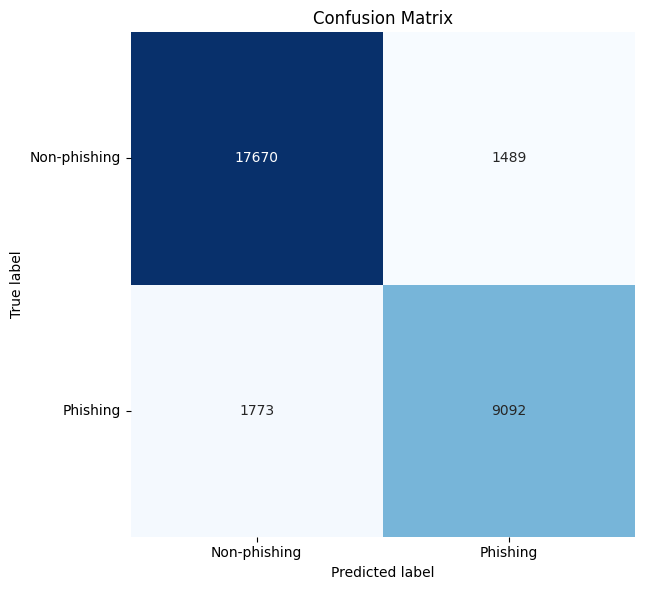

In [64]:
predictions = (model10.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

In [65]:
#from tensorflow.keras.layers import LeakyReLU
model11 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model11.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model11.fit(X_train, y_train, epochs=25,validation_split=0.2)

Epoch 1/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 2s 578us/step - accuracy: 0.8635 - loss: 0.3071 - val_accuracy: 0.8810 - val_loss: 0.2693
Epoch 2/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - accuracy: 0.8830 - loss: 0.2640 - val_accuracy: 0.8799 - val_loss: 0.2662
Epoch 3/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - accuracy: 0.8860 - loss: 0.2590 - val_accuracy: 0.8848 - val_loss: 0.2582
Epoch 4/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 415us/step - accuracy: 0.8867 - loss: 0.2572 - val_accuracy: 0.8829 - val_loss: 0.2611
Epoch 5/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step - accuracy: 0.8891 - loss: 0.2501 - val_accuracy: 0.8864 - val_loss: 0.2542
Epoch 6/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 415us/step - accuracy: 0.8891 - loss: 0.2472 - val_accuracy: 0.8869 - val_loss: 0.2530
Epoch 7/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 409us/step - accuracy: 0.8870 - loss: 0.2524 - val_accuracy: 0.8864 - val_loss: 0.2509
Epoch 8/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step - accuracy: 0.8909 -

In [66]:
test_loss, test_acc = model11.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step - accuracy: 0.8878 - loss: 0.2517
Test Accuracy: 0.8898547887802124


939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step


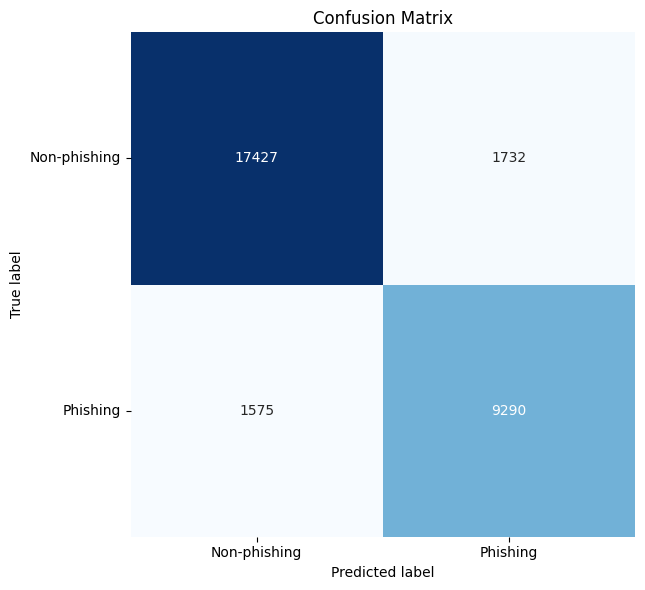

In [67]:
predictions = (model11.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

In [68]:
#from tensorflow.keras.layers import LeakyReLU
model12 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(16, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model12.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model12.fit(X_train, y_train, epochs=25,validation_split=0.2)

Epoch 1/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 2s 598us/step - accuracy: 0.8602 - loss: 0.3122 - val_accuracy: 0.8837 - val_loss: 0.2637
Epoch 2/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - accuracy: 0.8846 - loss: 0.2613 - val_accuracy: 0.8857 - val_loss: 0.2583
Epoch 3/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 413us/step - accuracy: 0.8846 - loss: 0.2570 - val_accuracy: 0.8818 - val_loss: 0.2620
Epoch 4/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 397us/step - accuracy: 0.8863 - loss: 0.2544 - val_accuracy: 0.8882 - val_loss: 0.2508
Epoch 5/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step - accuracy: 0.8856 - loss: 0.2517 - val_accuracy: 0.8889 - val_loss: 0.2531
Epoch 6/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step - accuracy: 0.8906 - loss: 0.2458 - val_accuracy: 0.8883 - val_loss: 0.2510
Epoch 7/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 395us/step - accuracy: 0.8886 - loss: 0.2514 - val_accuracy: 0.8897 - val_loss: 0.2513
Epoch 8/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 395us/step - accuracy: 0.8906 -

In [69]:
test_loss, test_acc = model12.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - accuracy: 0.8911 - loss: 0.2497
Test Accuracy: 0.893152117729187


939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step


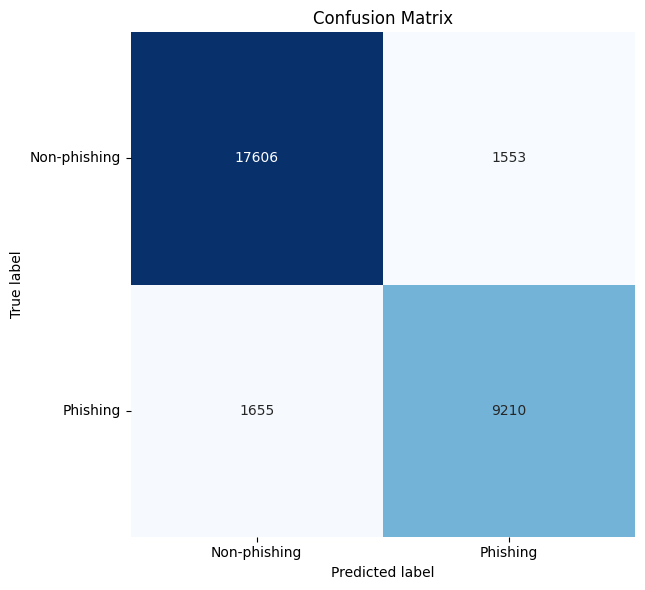

In [70]:
predictions = (model12.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

In [71]:
df.head()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,...,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing,total_spchar,spchar_share
0,37,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0.08
1,77,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0.01
2,126,4,1,2,0,1,3,0,2,0,...,0,0,0,0,0,0,1,1,13,0.10
3,18,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,0.11
4,55,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,4,0.07


In [85]:
df['phishing'].value_counts()

phishing
0    63715
1    36362
Name: count, dtype: int64

In [72]:
df['spchar_share']=df['spchar_share']*10
df.head()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,...,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing,total_spchar,spchar_share
0,37,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0.8
1,77,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0.1
2,126,4,1,2,0,1,3,0,2,0,...,0,0,0,0,0,0,1,1,13,1.0
3,18,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,1.1
4,55,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,4,0.7


In [73]:
X=df.drop(columns=['phishing'],axis=1).values
y=df['phishing'].values

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [75]:
trans=StandardScaler()
X_train=trans.fit_transform(X_train)
X_test=trans.transform(X_test)

In [76]:
#from tensorflow.keras.layers import LeakyReLU
model_13 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model_13.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model_13.fit(X_train, y_train, epochs=35,validation_split=0.2)

Epoch 1/35
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 2s 439us/step - accuracy: 0.8619 - loss: 0.3101 - val_accuracy: 0.8820 - val_loss: 0.2664
Epoch 2/35
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step - accuracy: 0.8785 - loss: 0.2700 - val_accuracy: 0.8836 - val_loss: 0.2621
Epoch 3/35
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step - accuracy: 0.8831 - loss: 0.2640 - val_accuracy: 0.8827 - val_loss: 0.2634
Epoch 4/35
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step - accuracy: 0.8861 - loss: 0.2587 - val_accuracy: 0.8867 - val_loss: 0.2577
Epoch 5/35
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - accuracy: 0.8850 - loss: 0.2536 - val_accuracy: 0.8858 - val_loss: 0.2542
Epoch 6/35
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step - accuracy: 0.8876 - loss: 0.2495 - val_accuracy: 0.8904 - val_loss: 0.2525
Epoch 7/35
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 407us/step - accuracy: 0.8872 - loss: 0.2474 - val_accuracy: 0.8874 - val_loss: 0.2530
Epoch 8/35
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step - accuracy: 0.8894 -

In [77]:
test_loss, test_acc = model_13.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step - accuracy: 0.8926 - loss: 0.2509
Test Accuracy: 0.8956501483917236


939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step


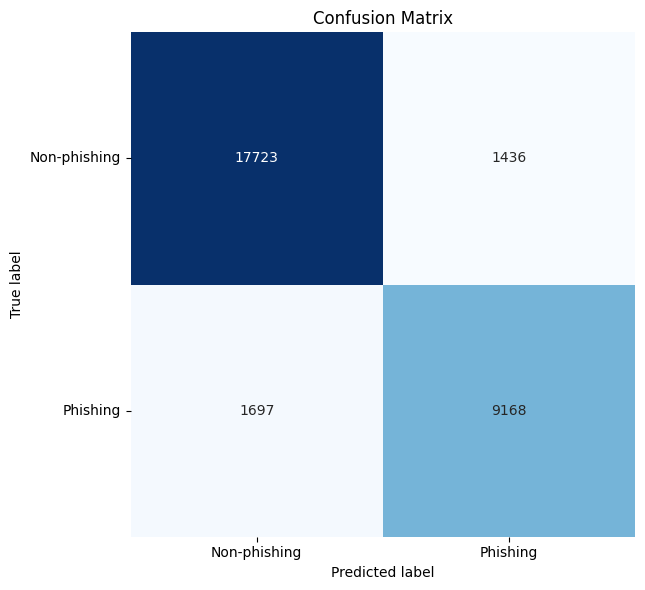

In [78]:
predictions = (model_13.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

In [79]:
#from tensorflow.keras.layers import LeakyReLU
model_14 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model_14.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model_14.fit(X_train, y_train, epochs=35,validation_split=0.2)

Epoch 1/35
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - accuracy: 0.8680 - loss: 0.3044 - val_accuracy: 0.8829 - val_loss: 0.2649
Epoch 2/35
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 390us/step - accuracy: 0.8811 - loss: 0.2652 - val_accuracy: 0.8840 - val_loss: 0.2586
Epoch 3/35
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 404us/step - accuracy: 0.8848 - loss: 0.2590 - val_accuracy: 0.8844 - val_loss: 0.2559
Epoch 4/35
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 395us/step - accuracy: 0.8842 - loss: 0.2549 - val_accuracy: 0.8865 - val_loss: 0.2603
Epoch 5/35
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step - accuracy: 0.8880 - loss: 0.2510 - val_accuracy: 0.8859 - val_loss: 0.2551
Epoch 6/35
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step - accuracy: 0.8895 - loss: 0.2475 - val_accuracy: 0.8874 - val_loss: 0.2519
Epoch 7/35
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 392us/step - accuracy: 0.8922 - loss: 0.2422 - val_accuracy: 0.8864 - val_loss: 0.2531
Epoch 8/35
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 407us/step - accuracy: 0.8878 -

In [80]:
test_loss, test_acc = model_14.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step - accuracy: 0.8896 - loss: 0.2520
Test Accuracy: 0.893018901348114


939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step


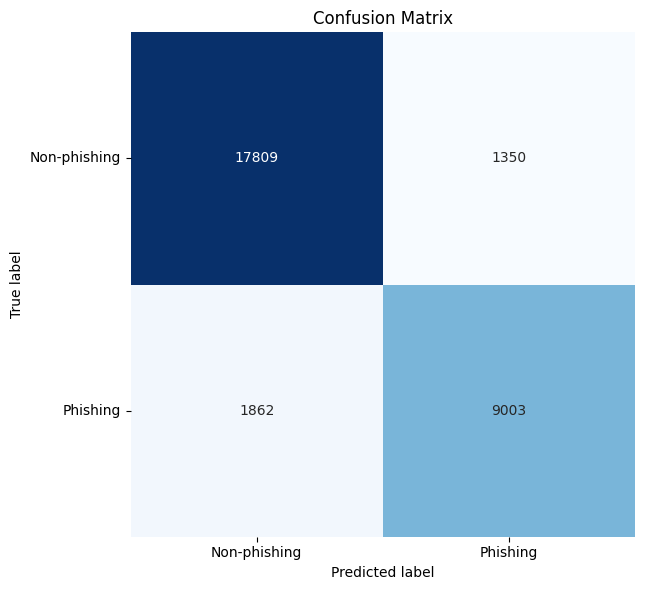

In [81]:
predictions = (model_14.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

In [83]:
features = {
        "url_length": 1,
        "n_dots":2,
        "n_hypens": 2,
        "n_underline": 3,
        "n_slash": 4,
        "n_questionmark": 4,
        "n_equal": 5,
        "n_at": 6,}

In [82]:
import pickle
pickle.dump(model_14,open('model_14.pkl','wb'))

In [83]:
pickle.dump(model_13,open('model_13.pkl','wb'))

In [84]:
pickle.dump(model12,open('model_12.pkl','wb'))
pickle.dump(model11,open('model_11.pkl','wb'))
pickle.dump(model10,open('model_10.pkl','wb'))

In [88]:
l=np.array(l)

In [89]:
l.shape

(21,)

In [90]:
X_train.shape

(70053, 21)

In [91]:
X_test.shape

(30024, 21)

In [92]:
l=np.expand_dims(l,axis=0)
l.shape

(1, 21)

In [93]:
a=(model_14.predict(l)>0.5).astype(int)

1/1 [==============================] - 0s 20ms/step


In [94]:
a[0][0]

1